In [1]:
from tinygrad.lazy import Device
from tinygrad.tensor import Tensor 
import numpy as np 

In [2]:
words = open('names.txt', 'r').read().splitlines()

In [3]:
chars = sorted(list(set(''.join(words))))
stoi = { s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s, i in stoi.items()}

In [51]:

xs, ys = [], []
losses = []

for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]): 
    ix1, ix2 = stoi[ch1], stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)

xs, ys = Tensor(xs), Tensor(ys)

In [49]:
Device.DEFAULT = 'CPU'

In [ ]:
# xenc = F.one_hot(xs, num_classes=27).float()
x = xs.numpy()
one_hot = np.zeros((x.shape[0], 27))
one_hot[np.arange(x.shape[0]), x.astype('int32')] = 1
xenc = Tensor(one_hot.astype('float32'), requires_grad=True)
W = Tensor.uniform(27, 27, requires_grad=True)

for k in range(100): 
  # forward pass 
  logits = xenc @ W
  counts = logits.exp()
  probs = counts / counts.sum(axis=1, keepdim=True)

  zeros = np.zeros((probs.shape), dtype=np.float32)
  zeros[range(x.shape[0]), ys.numpy().astype('int32')] = 1.0
  correct_probs = probs.mul(Tensor(zeros)).sum(axis=1)
  loss = -correct_probs.log().mean() + 0.01*(W**2).mean()

  # backward pass 
  # W.grad = None 
  loss.backward()
  print(loss.numpy())

  # update 
  print(W.grad)
  W += -30 * W.grad

  # losses.append(loss.detach())
  break

# loss.item()


[3.4030433]
<Tensor <LB (27, 27) dtypes.float op:BinaryOps.ADD st:ShapeTracker(shape=(27, 27), views=[View((27, 27), (27, 1), 0)])> with grad None>


AssertionError: 

In [9]:
import numpy as np
import matplotlib.pyplot as plt

d1 = np.arange(1, 7)
d1.mean(), d1.std()

(3.5, 1.707825127659933)

In [33]:
# this is how to calculate the standard deviation
d1_mean = d1.mean()
d1_var = np.power(d1 - d1_mean, 2).mean()
d1_std = np.sqrt(d1_var)
d1_mean, d1_var, d1_std

(3.5, 2.9166666666666665, 1.707825127659933)

In [13]:
d2 = np.arange(1, 7)
d2

array([1, 2, 3, 4, 5, 6])

(array([1., 2., 3., 4., 5., 6., 5., 4., 3., 3.]),
 array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ]),
 <BarContainer object of 10 artists>)

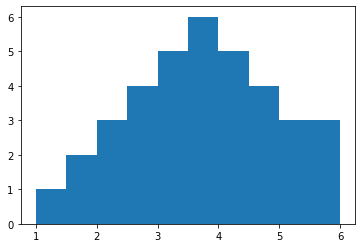

In [102]:

values = np.concatenate([v + d2 for v in d1])/2
plt.hist(values)

In [119]:
values.mean(), values.var(), values.std()

(3.5, 1.4583333333333333, 1.20761472884912)

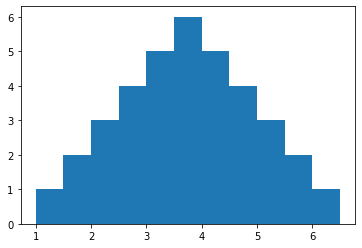

In [150]:
counts, bins = np.histogram(values.tolist(), bins=np.arange(1, 7, 0.5))
plt.stairs(counts, bins, fill=True)